In [575]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
 

In [576]:
df = pd.read_csv(r"C:\DATASCIENCE\Internship\Datasets\titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [577]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [579]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [580]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [581]:
df = df.drop(['Cabin','Embarked'],axis = 1)

In [582]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


In [583]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [584]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
dtype: int64

Text(0.5, 1.0, 'Survival Chart')

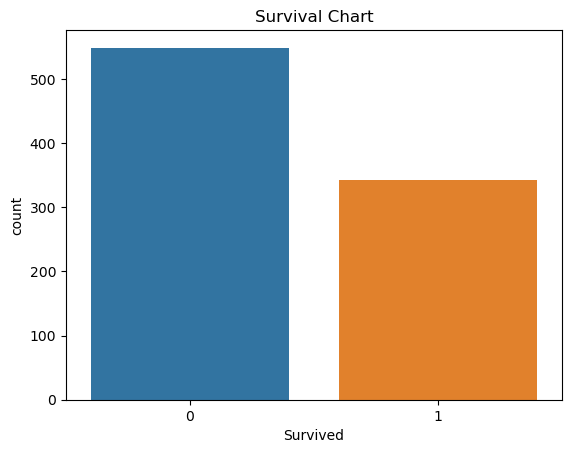

In [585]:
sns.countplot(x= "Survived", data=df)
plt.title("Survival Chart")

Text(0.5, 1.0, 'Survival rate based on Sex')

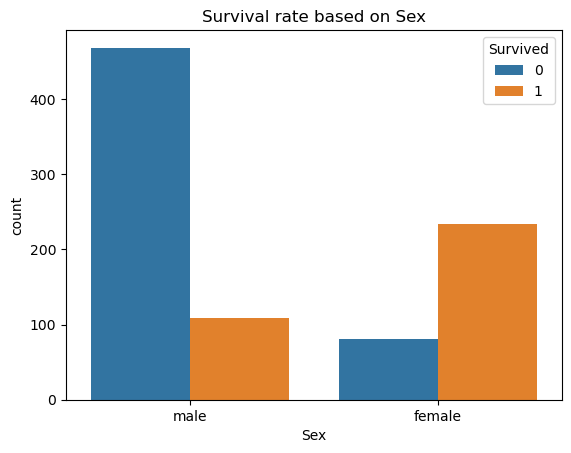

In [586]:
sns.countplot(x = "Sex",hue = "Survived", data = df)
plt.title("Survival rate based on Sex")

In [587]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80] 
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [588]:
survival_by_age = df.groupby('AgeGroup')['Survived'].mean()  
print(survival_by_age)

AgeGroup
0-10     0.612903
10-20    0.401961
20-30    0.324937
30-40    0.437126
40-50    0.382022
50-60    0.416667
60-70    0.315789
70-80    0.000000
Name: Survived, dtype: float64


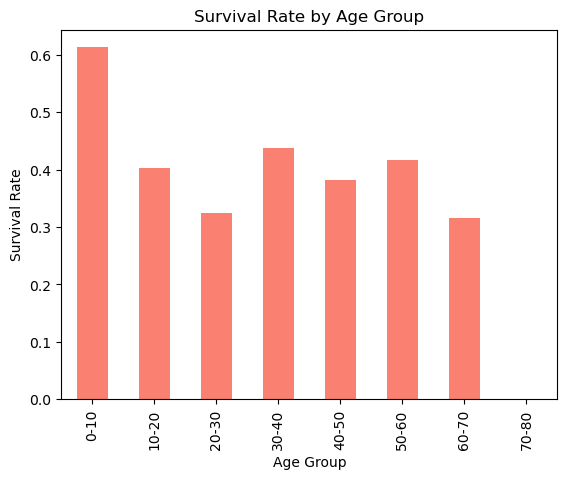

In [589]:
# Visualization (bar plot)
survival_by_age.plot(kind='bar', color='Salmon')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

In [590]:
df['Survived'] = df['Survived'].map({0: 'Did Not Survive', 1: 'Survived'})
print(df['Survived'].value_counts())

Did Not Survive    549
Survived           342
Name: Survived, dtype: int64


In [591]:
df = pd.get_dummies(df, columns=["Sex"], drop_first=True)

In [592]:
df.drop(['Name', 'Ticket', 'PassengerId', 'Fare', 'AgeGroup'], axis=1, inplace=True)


In [593]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [594]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [595]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=42)


In [596]:
model = LogisticRegression(max_iter=1000)  
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [597]:
y_pred = model.predict(x_test)


In [598]:
ddf_lr =pd.DataFrame({"Y_test":y_test,"Y-pred":y_pred})
print(ddf_lr)

              Y_test           Y-pred
709         Survived  Did Not Survive
439  Did Not Survive  Did Not Survive
840  Did Not Survive  Did Not Survive
720         Survived         Survived
39          Survived         Survived
..               ...              ...
821         Survived  Did Not Survive
633  Did Not Survive  Did Not Survive
456  Did Not Survive  Did Not Survive
500  Did Not Survive  Did Not Survive
430         Survived         Survived

[268 rows x 2 columns]


In [599]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                 precision    recall  f1-score   support

Did Not Survive       0.83      0.89      0.86       157
       Survived       0.83      0.74      0.78       111

       accuracy                           0.83       268
      macro avg       0.83      0.82      0.82       268
   weighted avg       0.83      0.83      0.83       268



In [600]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8283582089552238


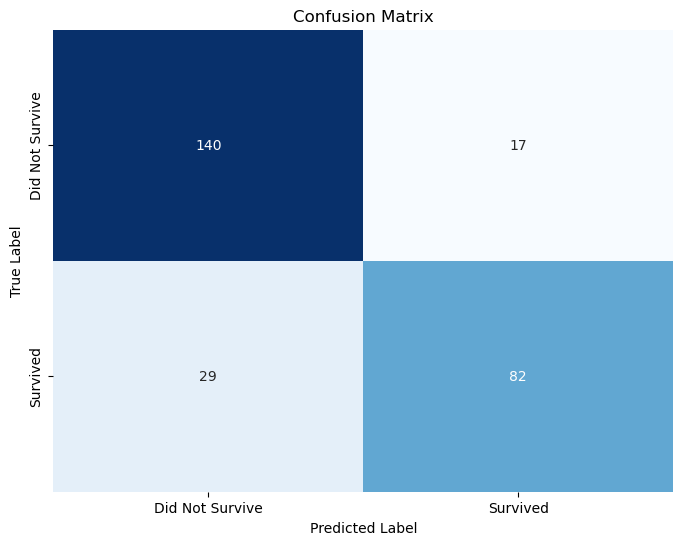

In [601]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()